In [1]:
!wget -N https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv

--2021-03-21 12:36:40--  https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv
Resolving data.rivm.nl (data.rivm.nl)... 2001:610:430:ffff::16:198, 131.224.250.75
Connecting to data.rivm.nl (data.rivm.nl)|2001:610:430:ffff::16:198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105275538 (100M) [text/csv]
Saving to: ‘COVID-19_casus_landelijk.csv’

COVID-19_casus_land 100%[===================>] 100.40M  9.62MB/s    in 11s     

2021-03-21 12:36:51 (9.42 MB/s) - ‘COVID-19_casus_landelijk.csv’ saved [105275538/105275538]



In [2]:
import pandas as pd
import numpy  as np

from pyearth import Earth
from pyearth import export

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

In [3]:
df = pd.read_csv('COVID-19_casus_landelijk.csv', sep=';', parse_dates=[0, 1], infer_datetime_format=True)
df

Date_file Date_statistics Date_statistics_type Agegroup  \
0       2021-03-20 10:00:00      2020-01-01                  DOO    40-49   
1       2021-03-20 10:00:00      2020-01-01                  DOO    50-59   
2       2021-03-20 10:00:00      2020-01-01                  DOO    20-29   
3       2021-03-20 10:00:00      2020-01-01                  DOO    60-69   
4       2021-03-20 10:00:00      2020-01-04                  DOO    10-19   
...                     ...             ...                  ...      ...   
1194575 2021-03-20 10:00:00      2021-03-20                  DON    40-49   
1194576 2021-03-20 10:00:00      2021-03-20                  DPL    50-59   
1194577 2021-03-20 10:00:00      2021-03-20                  DPL    30-39   
1194578 2021-03-20 10:00:00      2021-03-20                  DPL    30-39   
1194579 2021-03-20 10:00:00      2021-03-20                  DPL    60-69   

            Sex       Province Hospital_admission Deceased  Week_of_death  \
0        Female  Noord-Holland                 No       No            NaN   
1          Male     Gelderland                 No       No            NaN   
2        Female   Zuid-Holland                 No       No            NaN   
3        Female  Noord-Holland                 No       No            NaN   
4        Female     Gelderland            Unknown       No            NaN   
...         ...            ...                ...      ...            ...   
1194575  Female   Zuid-Holland            Unknown  Unknown            NaN   
1194576  Female   Zuid-Holland            Unknown  Unknown            NaN   
1194577    Male        Utrecht            Unknown  Unknown            NaN   
1194578    Male  Noord-Brabant            Unknown       No            NaN   
1194579  Female  Noord-Brabant            Unknown  Unknown            NaN   

                                  Municipal_health_service  
0                                            GGD Amsterdam  
1        Veiligheids- en Gezondheidsregio Gelderland-Mi...  
2                                      GGD Hollands-Midden  
3                                     GGD Hollands-Noorden  
4                                      GGD Gelderland-Zuid  
...                                                    ...  
1194575                                     GGD Haaglanden  
1194576                             GGD Rotterdam-Rijnmond  
1194577                                  GGD Regio Utrecht  
1194578                               GGD Brabant-Zuidoost  
1194579                              GGD Hart voor Brabant  

[1194580 rows x 10 columns]

In [4]:
df.count()

Date_file                   1194580
Date_statistics             1194580
Date_statistics_type        1194580
Agegroup                    1194580
Sex                         1194580
Province                    1194580
Hospital_admission          1194580
Deceased                    1194580
Week_of_death                 16259
Municipal_health_service    1194580
dtype: int64

In [5]:
daterep = 'Date_statistics'
region  = 'Agegroup'
cases   = 'cases'
deaths  = 'Deceased'

lastdate = df[daterep].max() - pd.Timedelta('7 days')

df[cases]  = 1
df[deaths] = df[deaths].apply(lambda x: 1 if x == 'Yes' else 0)
df

Date_file Date_statistics Date_statistics_type Agegroup  \
0       2021-03-20 10:00:00      2020-01-01                  DOO    40-49   
1       2021-03-20 10:00:00      2020-01-01                  DOO    50-59   
2       2021-03-20 10:00:00      2020-01-01                  DOO    20-29   
3       2021-03-20 10:00:00      2020-01-01                  DOO    60-69   
4       2021-03-20 10:00:00      2020-01-04                  DOO    10-19   
...                     ...             ...                  ...      ...   
1194575 2021-03-20 10:00:00      2021-03-20                  DON    40-49   
1194576 2021-03-20 10:00:00      2021-03-20                  DPL    50-59   
1194577 2021-03-20 10:00:00      2021-03-20                  DPL    30-39   
1194578 2021-03-20 10:00:00      2021-03-20                  DPL    30-39   
1194579 2021-03-20 10:00:00      2021-03-20                  DPL    60-69   

            Sex       Province Hospital_admission  Deceased  Week_of_death  \
0        Female  Noord-Holland                 No         0            NaN   
1          Male     Gelderland                 No         0            NaN   
2        Female   Zuid-Holland                 No         0            NaN   
3        Female  Noord-Holland                 No         0            NaN   
4        Female     Gelderland            Unknown         0            NaN   
...         ...            ...                ...       ...            ...   
1194575  Female   Zuid-Holland            Unknown         0            NaN   
1194576  Female   Zuid-Holland            Unknown         0            NaN   
1194577    Male        Utrecht            Unknown         0            NaN   
1194578    Male  Noord-Brabant            Unknown         0            NaN   
1194579  Female  Noord-Brabant            Unknown         0            NaN   

                                  Municipal_health_service  cases  
0                                            GGD Amsterdam      1  
1        Veiligheids- en Gezondheidsregio Gelderland-Mi...      1  
2                                      GGD Hollands-Midden      1  
3                                     GGD Hollands-Noorden      1  
4                                      GGD Gelderland-Zuid      1  
...                                                    ...    ...  
1194575                                     GGD Haaglanden      1  
1194576                             GGD Rotterdam-Rijnmond      1  
1194577                                  GGD Regio Utrecht      1  
1194578                               GGD Brabant-Zuidoost      1  
1194579                              GGD Hart voor Brabant      1  

[1194580 rows x 11 columns]

In [6]:
df_geo = df.pivot_table(index=daterep, columns=region, values=[cases, deaths], aggfunc='sum').fillna(0)
df_geo['cases']

Agegroup           0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79  \
Date_statistics                                                           
2020-01-01         0.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0   
2020-01-04         0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
2020-01-06         0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
2020-01-16         1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2020-01-20         1.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
...                ...    ...    ...    ...    ...    ...    ...    ...   
2021-03-16       325.0  656.0  760.0  648.0  714.0  652.0  355.0  199.0   
2021-03-17       340.0  625.0  723.0  576.0  562.0  542.0  299.0  172.0   
2021-03-18       387.0  702.0  768.0  614.0  564.0  522.0  313.0  136.0   
2021-03-19       254.0  511.0  563.0  472.0  489.0  499.0  286.0  162.0   
2021-03-20        44.0   92.0   71.0   56.0   63.0   60.0   34.0   30.0   

Agegroup         80-89   90+  <50  Unknown  
Date_statistics                             
2020-01-01         0.0   0.0  0.0      0.0  
2020-01-04         0.0   0.0  0.0      0.0  
2020-01-06         0.0   0.0  0.0      0.0  
2020-01-16         0.0   0.0  0.0      0.0  
2020-01-20         0.0   0.0  0.0      0.0  
...                ...   ...  ...      ...  
2021-03-16        60.0  14.0  0.0      0.0  
2021-03-17        86.0  13.0  0.0      0.0  
2021-03-18        72.0  13.0  0.0      0.0  
2021-03-19        59.0   4.0  0.0      0.0  
2021-03-20        11.0   1.0  0.0      0.0  

[421 rows x 12 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [7]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

Deceased                                                       ...  \
Agegroup        0-9 10-19 20-29 30-39 40-49 50-59 60-69 70-79 80-89  90+  ...   
2020-01-01      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...   
2020-01-02      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2020-01-03      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2020-01-04      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...   
2020-01-05      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...   
2022-03-16      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2022-03-17      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2022-03-18      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2022-03-19      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2022-03-20      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   

           cases                                                        
Agegroup   20-29 30-39 40-49 50-59 60-69 70-79 80-89  90+  <50 Unknown  
2020-01-01   1.0   0.0   1.0   1.0   1.0   0.0   0.0  0.0  0.0     0.0  
2020-01-02   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2020-01-03   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2020-01-04   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0     0.0  
2020-01-05   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
...          ...   ...   ...   ...   ...   ...   ...  ...  ...     ...  
2022-03-16   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2022-03-17   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2022-03-18   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2022-03-19   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2022-03-20   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  

[810 rows x 24 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [8]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    810.000000
mean     404.500000
std      233.971152
min        0.000000
25%      202.250000
50%      404.500000
75%      606.750000
max      809.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [9]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [10]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

Running multiple wave analysis for '0-9'
Minimum number of cases is 2
Wave 01 beta 20.805 mu 201 fit 0.942 peak 2020-07-20 from 2020-06-18 to 2020-09-26 size 546
Wave 02 beta  9.985 mu 150 fit 0.797 peak 2020-05-30 from 2020-05-15 to 2020-07-01 size 237
Wave 03 beta 15.104 mu  88 fit 0.868 peak 2020-03-29 from 2020-03-12 to 2020-04-28 size 120
Wave 04 beta  6.068 mu 278 fit 0.877 peak 2020-10-05 from 2020-09-24 to 2020-10-31 size 411
Wave 05 beta  6.973 mu 290 fit 0.880 peak 2020-10-17 from 2020-10-05 to 2020-11-20 size 792
Wave 06 beta  7.954 mu 303 fit 0.918 peak 2020-10-30 from 2020-10-16 to 2020-12-07 size 847
Wave 07 beta  9.446 mu 322 fit 0.921 peak 2020-11-18 from 2020-11-01 to 2021-01-04 size 1217
Wave 08 beta  6.921 mu 334 fit 0.844 peak 2020-11-30 from 2020-11-18 to 2021-01-02 size 677
Wave 09 beta  9.957 mu 351 fit 0.940 peak 2020-12-17 from 2020-11-26 to 2021-02-16 size 4531
Wave 10 beta  4.454 mu 362 fit 0.919 peak 2020-12-28 from 2020-12-21 to 2021-01-18 size 391
Wave 11 

Running multiple wave analysis for '60-69'
Minimum number of cases is 2
Wave 01 beta 15.201 mu  86 fit 0.824 peak 2020-03-27 from 2020-02-25 to 2020-06-27 size 6146
Wave 02 beta  2.620 mu  78 fit 0.397 peak 2020-03-19 from 2020-03-15 to 2020-03-30 size 139
Wave 03 beta  4.825 mu 174 fit 0.896 peak 2020-06-23 from 2020-06-17 to 2020-07-05 size 57
Wave 04 beta  6.677 mu 189 fit 0.857 peak 2020-07-08 from 2020-06-30 to 2020-07-25 size 82
Wave 05 beta  6.764 mu 203 fit 0.916 peak 2020-07-22 from 2020-07-11 to 2020-08-17 size 318
Wave 06 beta  6.344 mu 215 fit 0.913 peak 2020-08-03 from 2020-07-23 to 2020-08-30 size 419
Wave 07 beta  7.941 mu 227 fit 0.921 peak 2020-08-15 from 2020-08-01 to 2020-09-18 size 580
Wave 08 beta  6.639 mu 242 fit 0.859 peak 2020-08-30 from 2020-08-19 to 2020-09-27 size 437
Wave 09 beta  8.769 mu 257 fit 0.899 peak 2020-09-14 from 2020-08-28 to 2020-11-03 size 2379
Wave 10 beta  6.924 mu 266 fit 0.770 peak 2020-09-23 from 2020-09-10 to 2020-11-02 size 1890
Wave 11

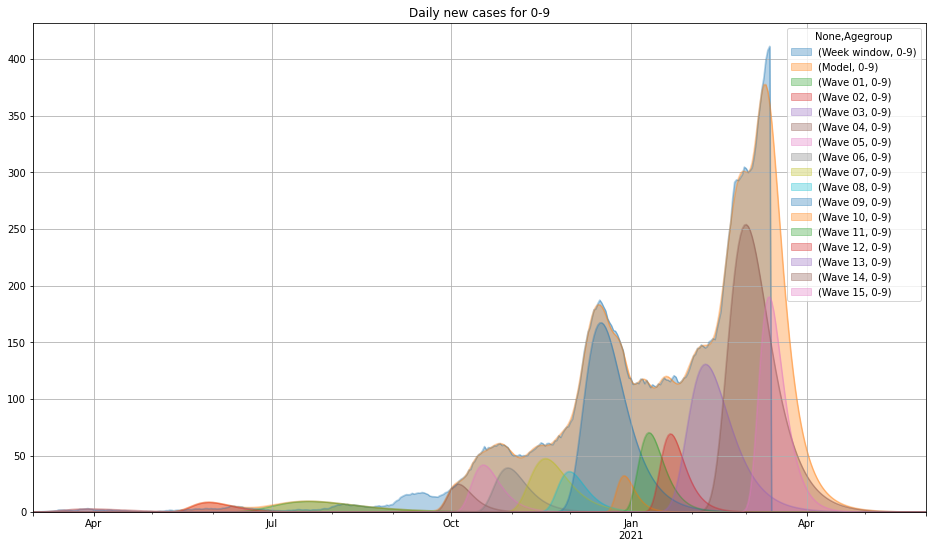

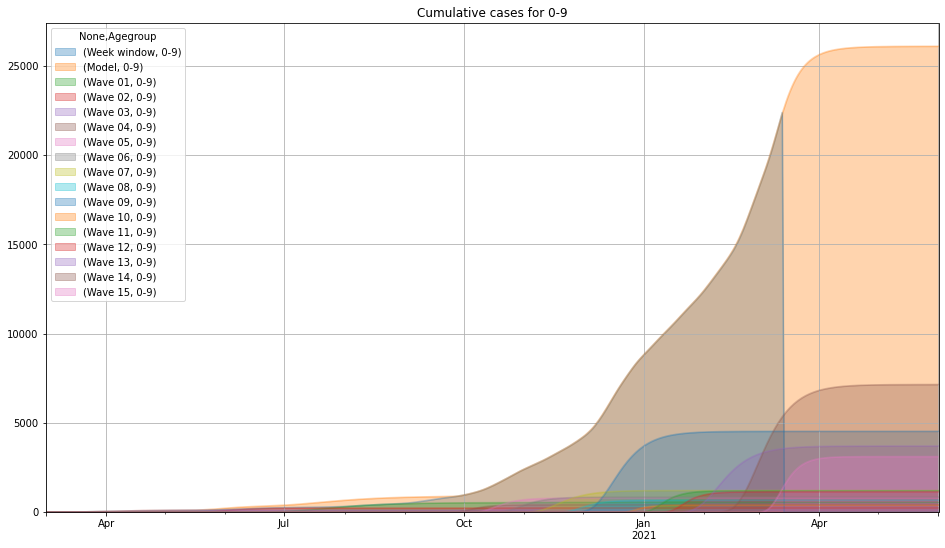

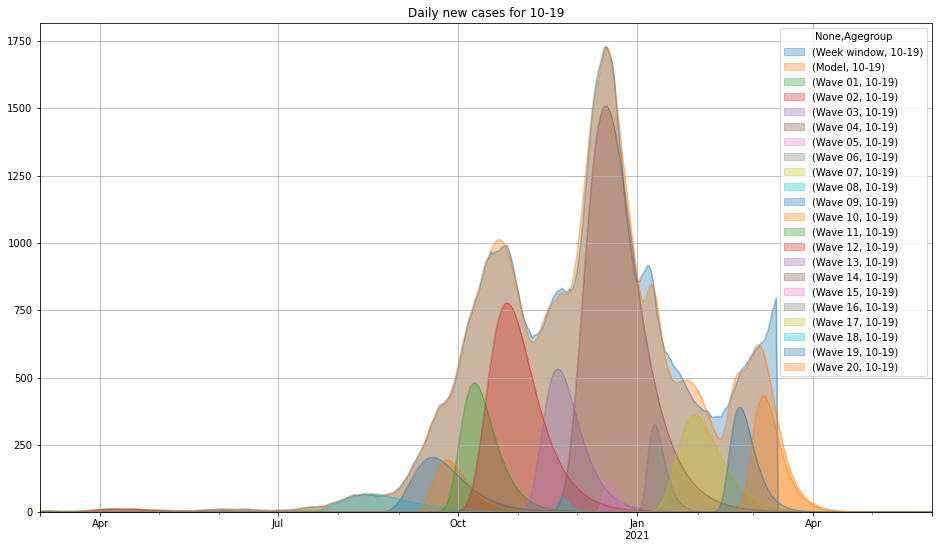

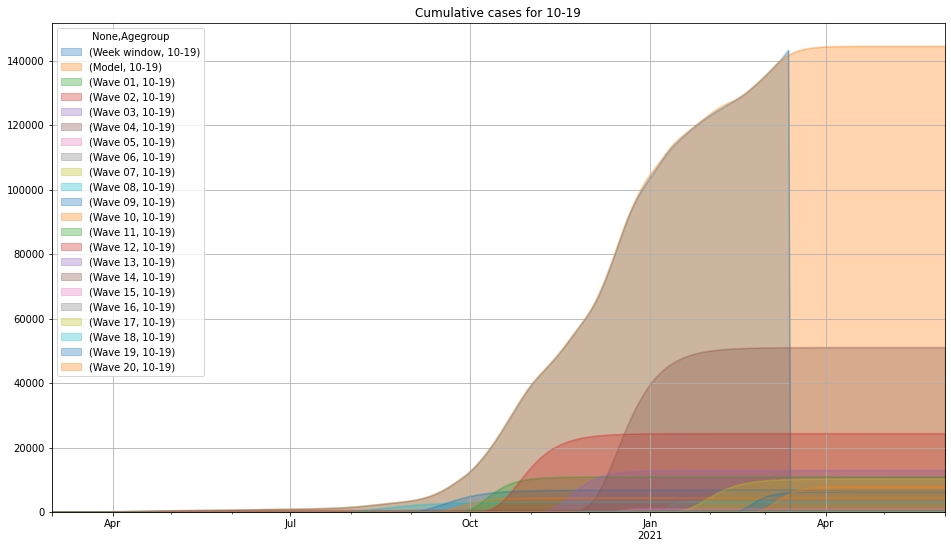

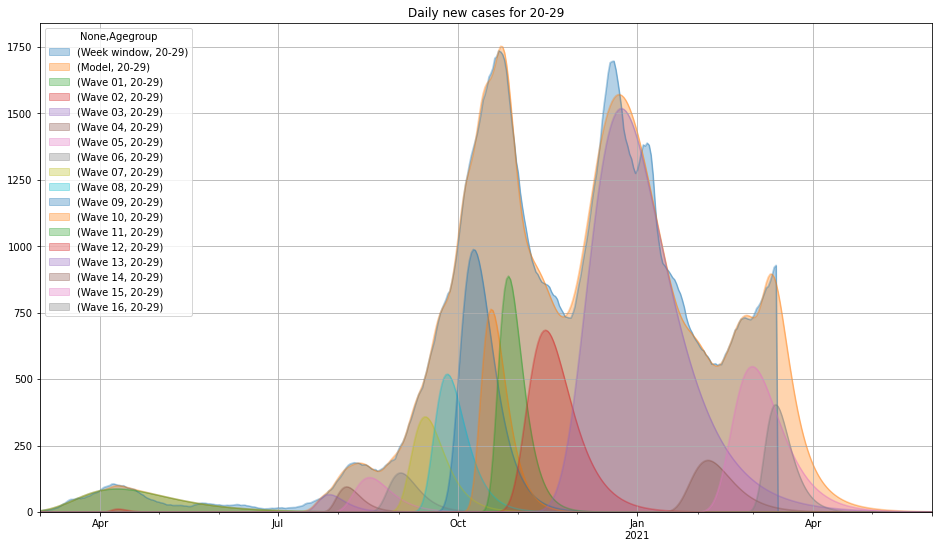

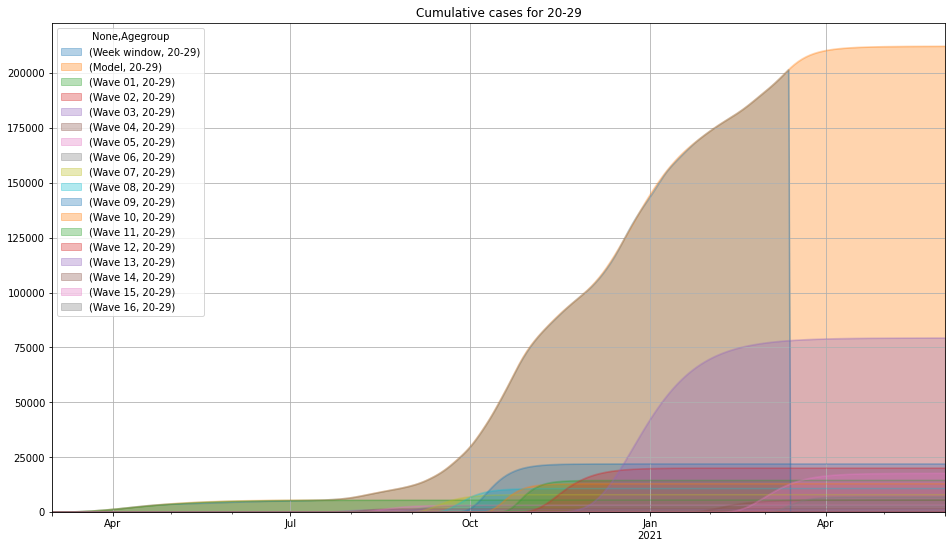

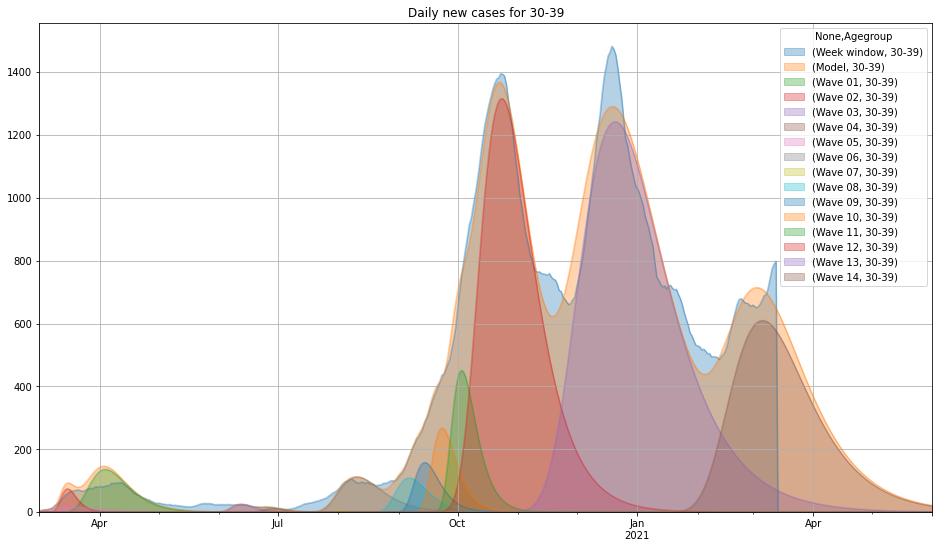

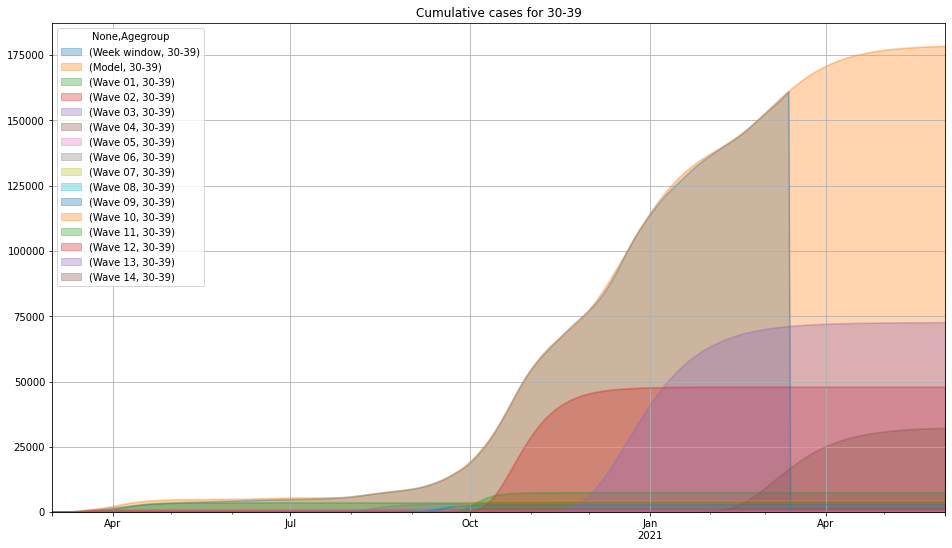

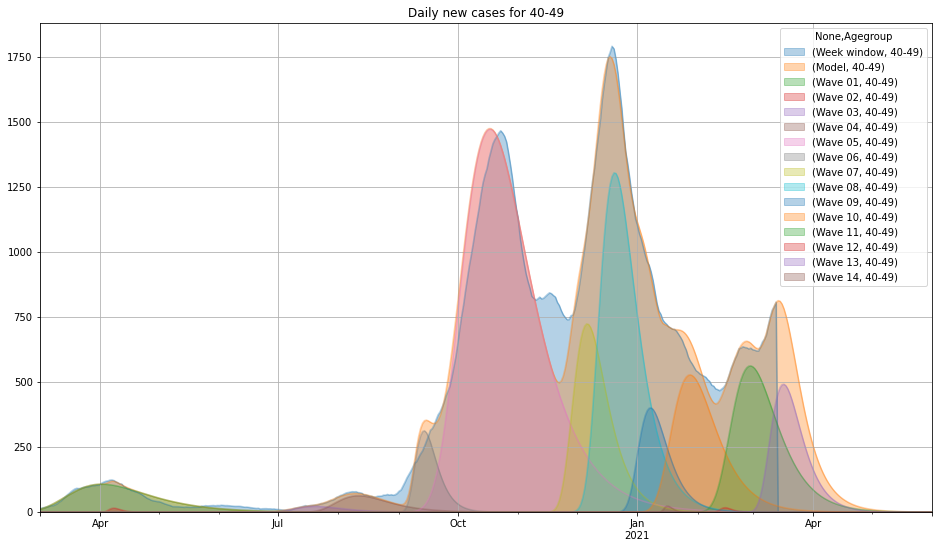

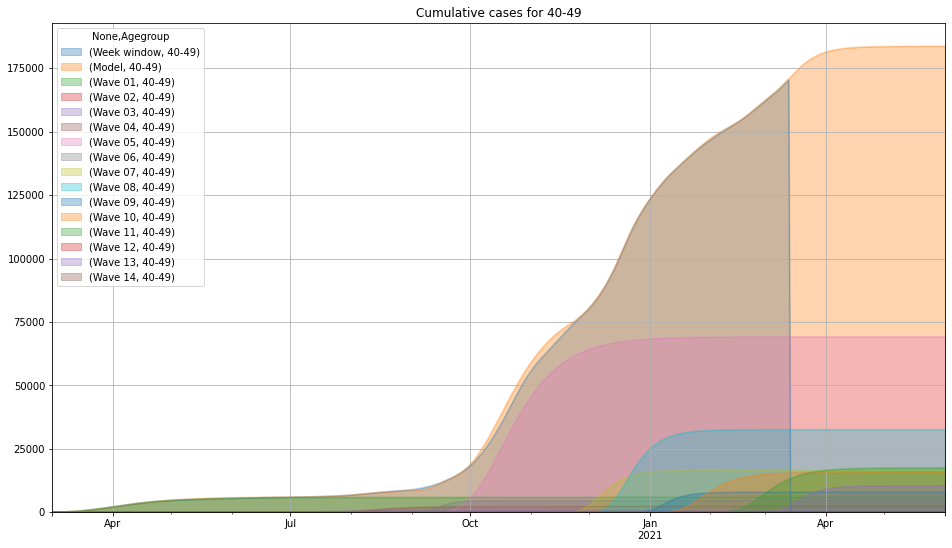

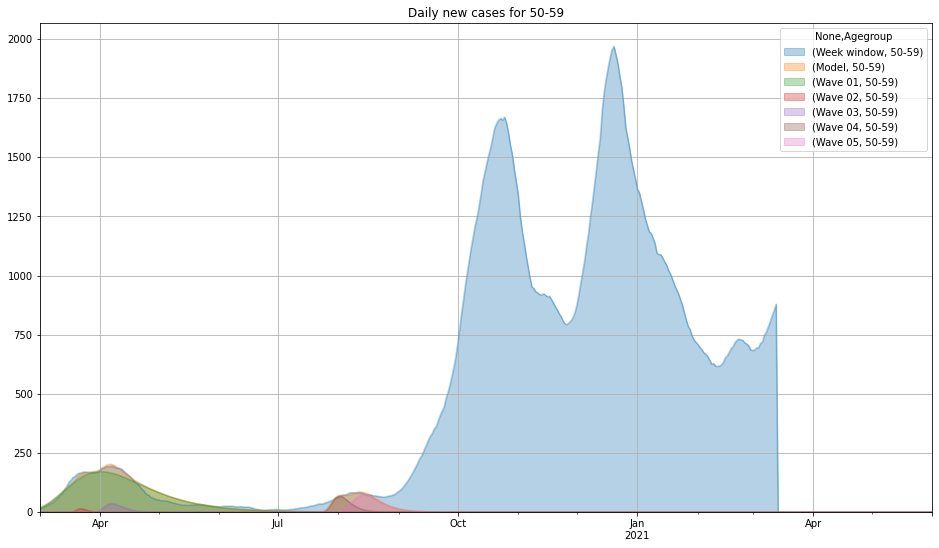

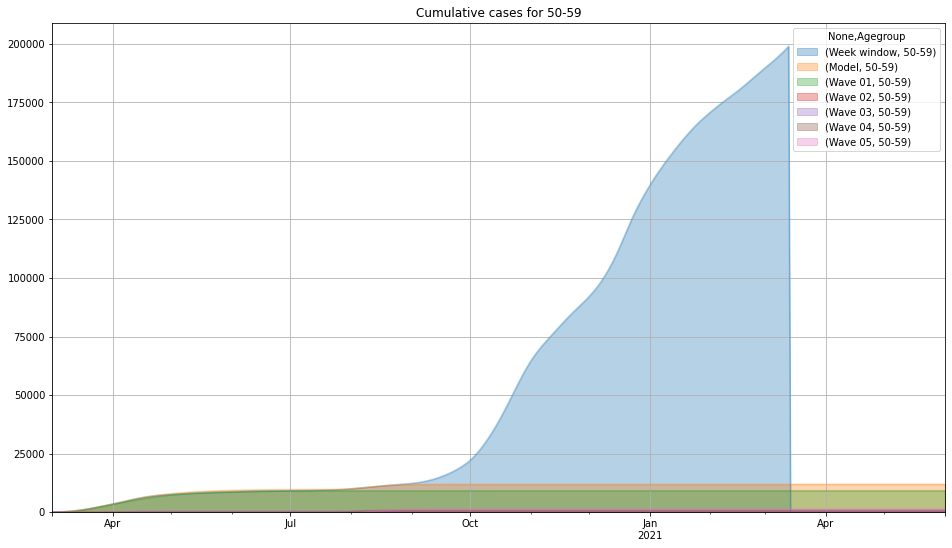

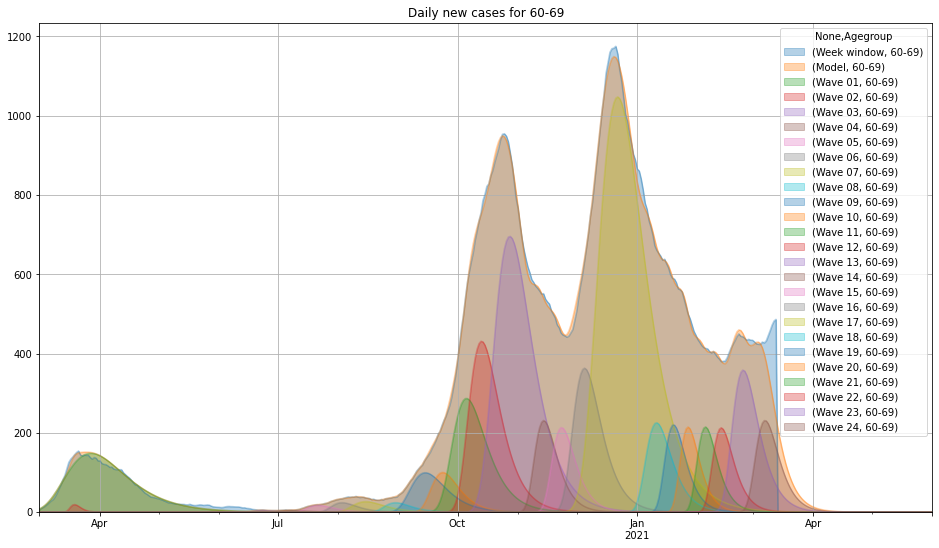

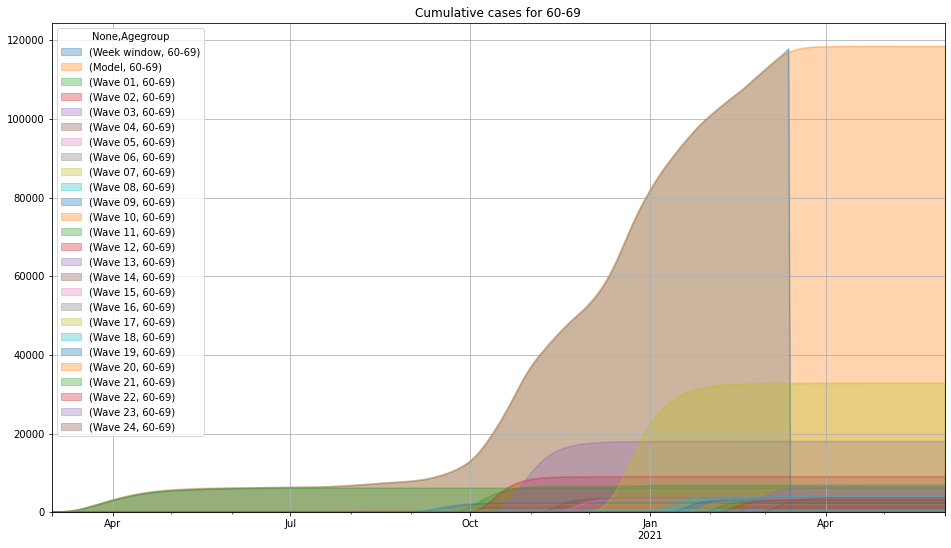

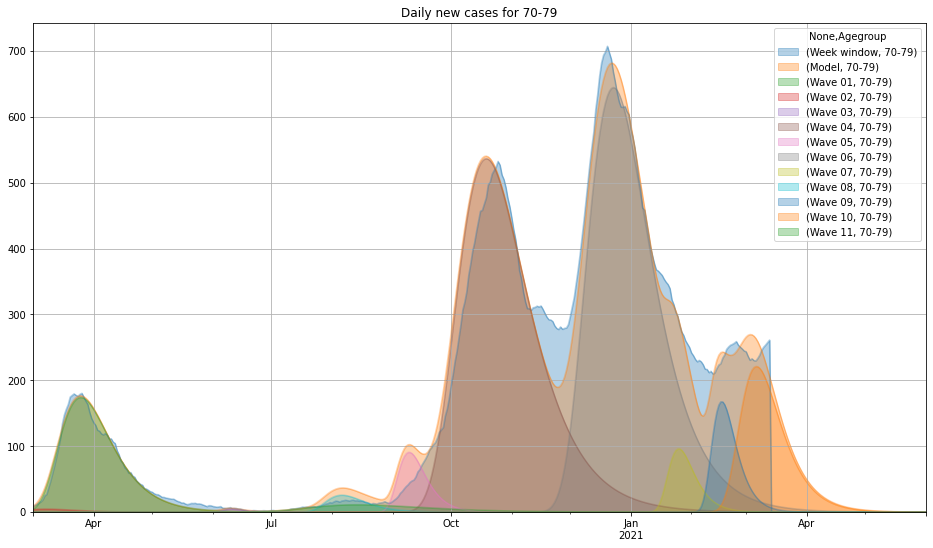

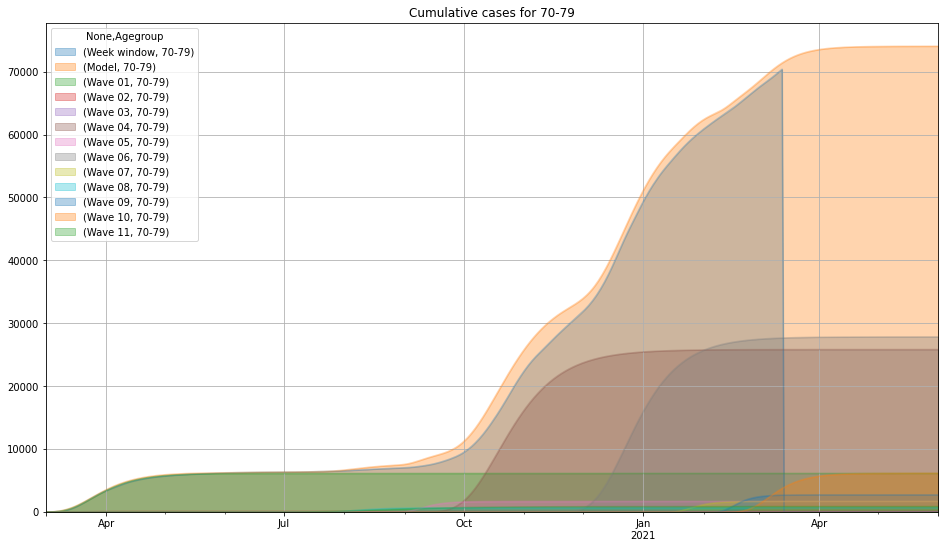

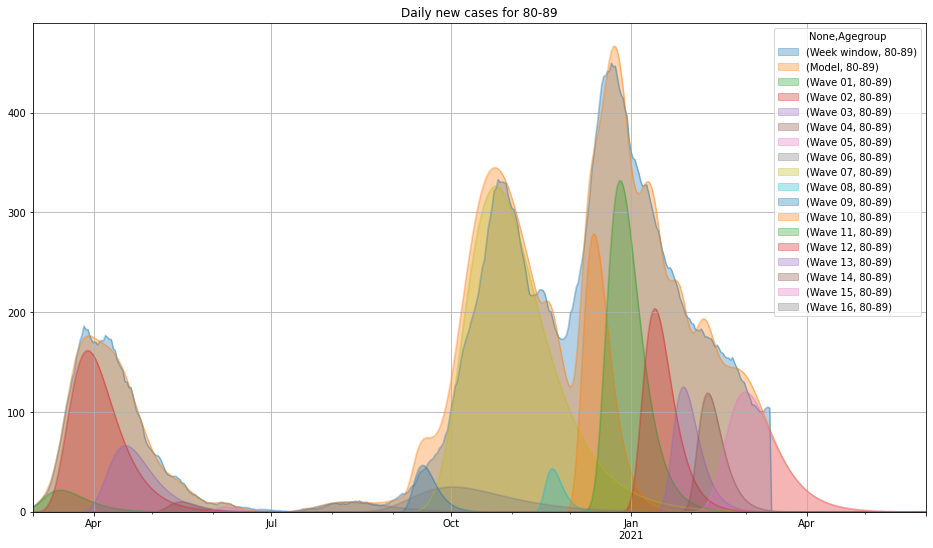

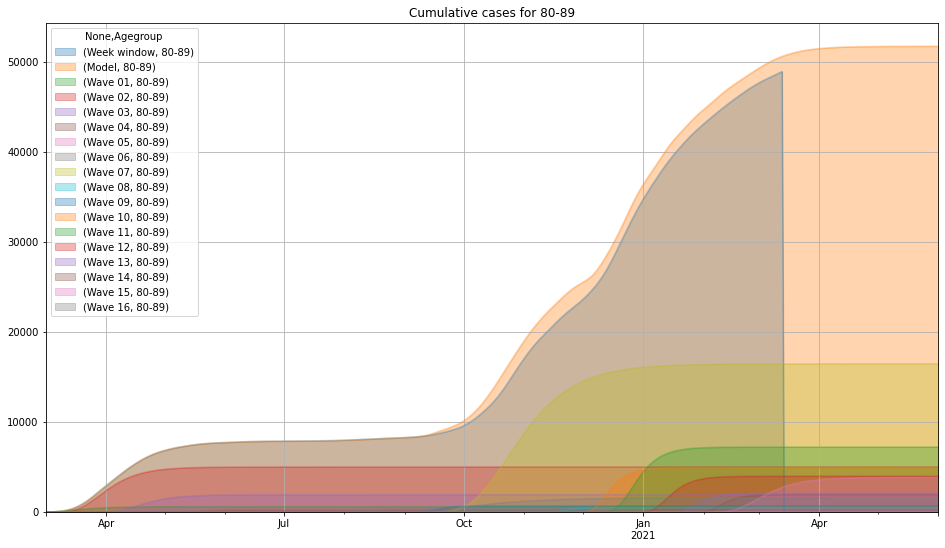

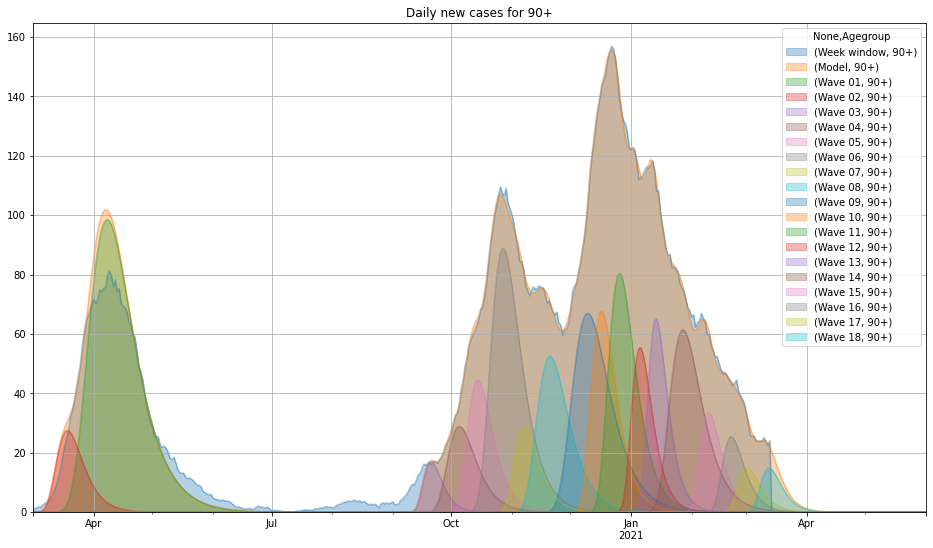

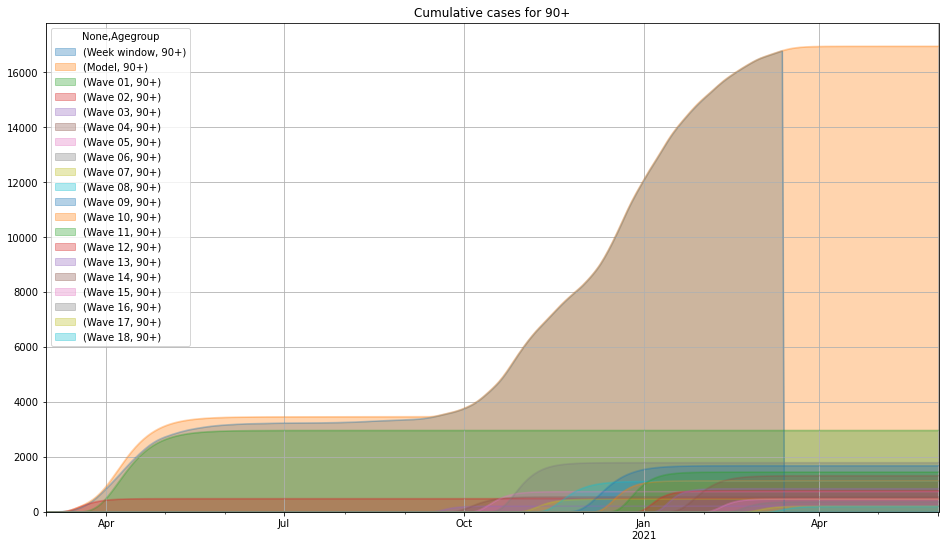

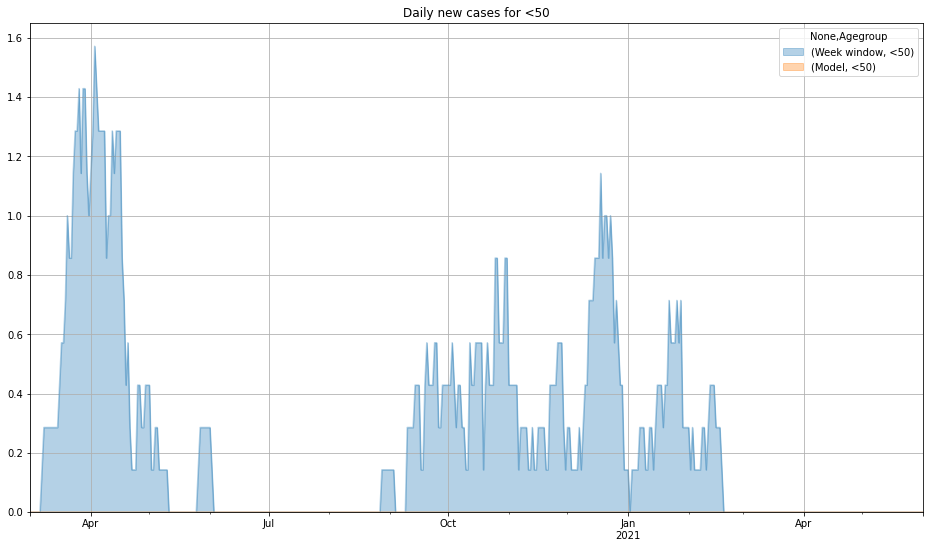

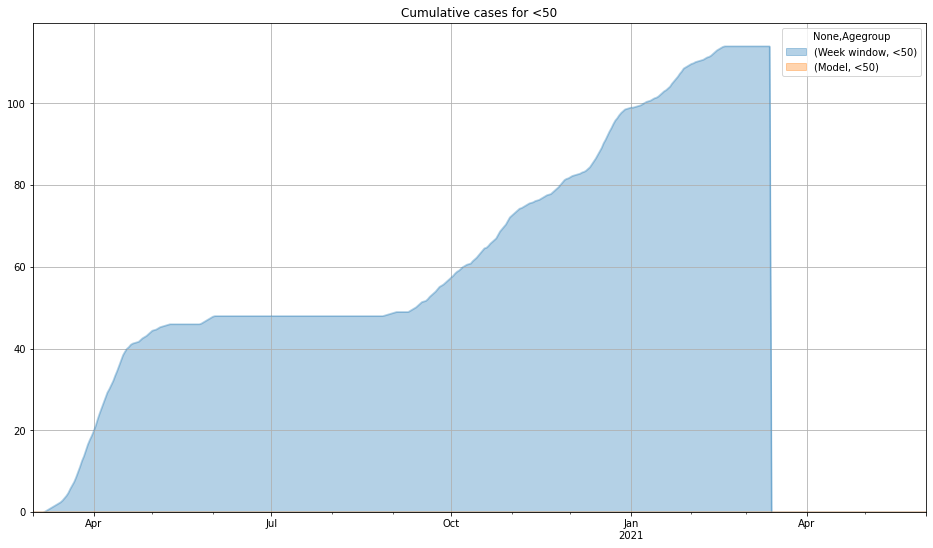

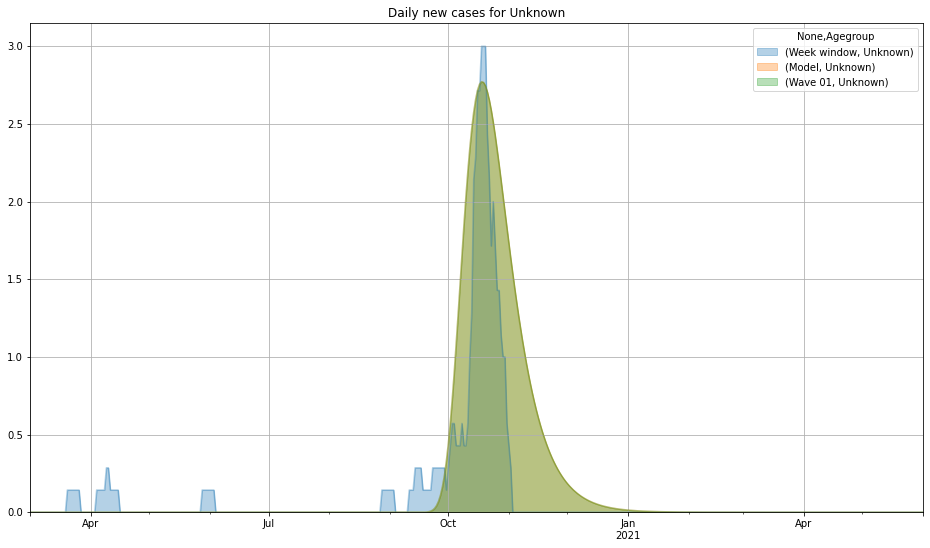

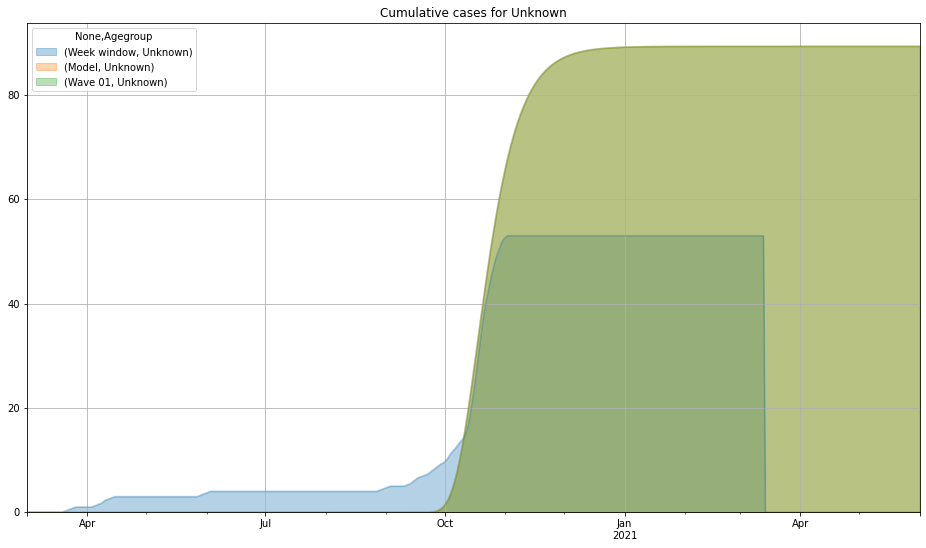

In [11]:
# Select regions to fit.
regions = np.sort(df[region].unique())

# Choose whether to output plots per region.
showplots = True

measure  = cases
smeasure = 'Week window' # smoothed
rmeasure = 'rcases'      # remaining
pmeasure = 'Model'       # predicted
wmeasure = 'Wave '       # waves

for region in regions:

    wave = 1

    df_geo[(pmeasure, region)] = 0
    df_geo[(smeasure, region)] = df_geo[measure][region].loc[:lastdate].rolling(7).mean()
    df_geo[(rmeasure, region)] = df_geo[smeasure][region]

    plotlist = [(smeasure, region), (pmeasure, region)]

    #countryname = df[df['geoId'] == country]['countriesAndTerritories'].iloc[0]
    #popdata = df[df['geoId'] == country]['popData2019'].iloc[0]

    #mincases = popdata / 1e6
    mincases = 2
    #mincases = df_geo[smeasure][country].sum() / 5000
    #mincases = max(popdata / 1e6, 10)

    print('Running multiple wave analysis for \'{}\''.format(region))
    print('Minimum number of cases is {:1.0f}'.format(mincases))

    while True:
        curwave = wmeasure + str((wave) + 1000)[-2:]
        df_geo[(curwave, region)] = 0

        df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                                measure:df_geo[rmeasure][region]})
        
        df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
        df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

        df_pred['linear'] = np.log(df_pred['gumdiv'])

        df_pred = df_pred[(df_pred['linear'] < -9/20) &
                          (df_pred['linear'] > -9/2)]

        if len(df_pred) <= 1:
            print('--- no data left')
            break

        eax = df_pred['daynum'].values.reshape(-1, 1)
        eay = df_pred['linear'].values.reshape(-1, 1)

        #eamodel = Earth()
        #eamodel = Earth(minspan=0)
        eamodel = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
        eamodel.fit(eax, eay)

        df_pred['earth'] = eamodel.predict(eax)

        daymin = df_pred['daynum'].min()
        daymax = df_pred['daynum'].max()

        #df_pred['gbgrad'] = np.gradient(df_pred['linear'])
        #df_pred['eagrad'] = np.gradient(df_pred['earth'])
        df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
        df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

        fitmod = export.export_python_function(eamodel)

        df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                           (df_pred['daynum'] == (daymin + 1)) |
                           (df_pred['daynum'] == daymax))
        df_pred['daycount'] = df_pred.reset_index().index

        df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
        df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
        df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

        df_knot['cand'] = ((df_knot['eagrad'] < -3/90) &
                           (df_knot['daysdata'] >= 3))
        
        df_knot['since'] = df_knot['daynum'] - daymin
        df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
        #df_knot['score'] = - df_knot['eagrad'] * df_knot['daysdata']
        df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

        choice = df_knot[df_knot['choice']]
        if len(choice) == 0:
            print('--- no data for wave')
            break

        lower = choice['daynum'].values[0]
        upper = choice['daysdata'].values[0] + lower

        df_pred = df_pred[(df_pred['daynum'] >= lower) &
                          (df_pred['daynum'] <= upper)].copy()

        slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
        intercept = fitmod([[lower]])[0] - (lower * slope)

        beta = - 1 / slope
        mu = beta * (intercept + np.log(beta))

        df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
        df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

        final = df_pred['scale'].mean()
        fincv = df_pred['scale'].std() / final

        df_geo[(curwave, region)] = final * gumpdf(df_geo['daynum'], beta, mu)        

        peak = df_geo[df_geo[(curwave, region)] == df_geo[(curwave, region)].max()].index.min()
        start = df_geo[(df_geo[(curwave, region)] >= 1) &
                       (df_geo[(curwave, region)].index < peak)].index.min()
        floor = df_geo[(df_geo[(curwave, region)] < 1) &
                       (df_geo[(curwave, region)].index > peak)].index.min()

        print('{} beta {:6.3f} mu {:3.0f} fit {:5.3f} peak {} from {} to {} size {:1.0f}'.format(
            curwave, beta, mu, (1 - fincv) ** 2, peak.date(), start.date(), floor.date(), final))
       
        df_geo[(pmeasure, region)] += df_geo[(curwave, region)]
        df_geo[(rmeasure, region)] -= df_geo[(curwave, region)]
        plotlist += [(curwave, region)]
        wave += 1
        
    if showplots:
        df_geo[plotlist].loc['20200301':'20210601'].plot(
            figsize=(16, 9),
            grid=True,
            kind='area',
            stacked=False,
            alpha=1/3,
            title='Daily new cases for '+region)

        df_geo[plotlist].loc['20200301':'20210601'].cumsum().plot(
            figsize=(16, 9),
            grid=True,
            kind='area',
            stacked=False,
            alpha=1/3,
            title='Cumulative cases for '+region)

In [12]:
df_out = df_geo[pmeasure].melt(ignore_index=False).reset_index()
df_out.columns = (['date', 'location', 'value'])
df_out.to_csv('zzcorggd.csv')

Keep exploring! Stay home, wash your hands, keep your distance.